## Predicting Adult Census Income Using XGBoost Tree Boosting System

## Package Requirement

In [356]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [357]:
# 读取 train.csv 文件
train_df = pd.read_csv("data/traindata.csv")

# 读取 data.csv 文件，假设数据列名为 'income'
data_df = pd.read_csv("data/trainlabel.csv")

# 将 'income' 数据列添加到 train_df 中
train_df['Income'] = data_df['Income']

# 将修改后的 train_df 保存为新的 CSV 文件
train_df.to_csv("data/updated_train.csv", index=False)

In [358]:
df = pd.read_csv('data/updated_train.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Income
0,77,Local-gov,177550,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,3818,0,14,United-States,0
1,40,Self-emp-inc,475322,Bachelors,13,Separated,Craft-repair,Own-child,White,Male,0,0,50,United-States,0
2,29,Self-emp-not-inc,341672,HS-grad,9,Married-spouse-absent,Transport-moving,Other-relative,Asian-Pac-Islander,Male,0,1564,50,India,1
3,41,Private,184378,HS-grad,9,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,0
4,22,Private,306967,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,25,United-States,0


In [359]:
# df.loc[df.duplicated() == True]

In [360]:
label_encoder = LabelEncoder()
categorical_columns = ['Income', 'workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
df[categorical_columns] = df[categorical_columns].apply(label_encoder.fit_transform)

In [361]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['Income']), df['Income'], test_size=0.12, random_state=38)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [363]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
print('**** ACCURACY_SCORE **** \n\n', accuracy_score(y_test, y_pred), '\n')
print('**** CLASSIFICATION_REPORT **** \n\n', classification_report(y_test, y_pred), '\n')
print('**** CONFUSION MATRIX ****')

**** ACCURACY_SCORE **** 

 0.8779239766081871 

**** CLASSIFICATION_REPORT **** 

               precision    recall  f1-score   support

           0       0.90      0.95      0.92      2088
           1       0.79      0.66      0.72       648

    accuracy                           0.88      2736
   macro avg       0.84      0.80      0.82      2736
weighted avg       0.87      0.88      0.87      2736
 

**** CONFUSION MATRIX ****


## Confusion Matrix
The confusion matrix is a commonly used tool to evaluate the performance of a classification model, especially in multi-class classification problems. It illustrates the relationship between the model's predictions on the test set and the true labels.

The primary purpose of the confusion matrix is to provide an intuitive understanding of the classification model's performance, particularly in terms of misclassifications between different classes. From the confusion matrix, we can comprehensively evaluate the model's performance.

<Axes: >

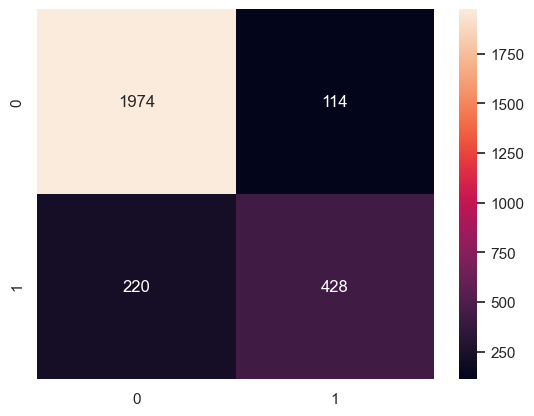

In [364]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

## Data Explanation

1. The number 1974 in the top-left corner represents the count of true negatives (TN), indicating instances where the true class is negative, and the model correctly predicted them as negative.
2. The number 114 in the top-right corner represents the count of false positives (FP), indicating instances where the true class is negative, but the model incorrectly predicted them as positive.
3. The number 220 in the bottom-left corner represents the count of false negatives (FN), indicating instances where the true class is positive, but the model incorrectly predicted them as negative.
4. The number 428 in the bottom-right corner represents the count of true positives (TP), indicating instances where the true class is positive, and the model correctly predicted them as positive.